## Title :
Упражнение: Простая kNN-регрессия

## Description :
Цель этого упражнения - **построить графики**, приведенные ниже. С этими графиками вы уже сталкивались в лекции.

<img src="../fig/fig2.png" style="width: 500px;">
<img src="../fig/fig3.png" style="width: 500px;">

## Описание данных:

## Инструкции:

<Часть 1:</u> KNN вручную для k=1
- Прочитайте данные о рекламе.
- Получите подмножество данных со строки 5 по строку 13.
- Примените алгоритм kNN вручную и постройте первый график, как указано выше.

<Часть 2:</u> Использование пакета sklearn
- Прочитайте набор данных Advertisement.
- Разделите данные на обучающий и тестовый наборы с помощью функции `train_test_split()`.
- Задайте `k_list` в качестве возможных значений k в диапазоне от 1 до 70.
- Для каждого значения `k` в `k_list`:
- использовать функцию `sklearn KNearestNeighbors()` для подгонки обучающих данных.
- Прогнозирование на тестовых данных.
- Используйте вспомогательный код для получения второго графика для k=1,10,70.



## Hints: 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.argsort.html" target="_blank">np.argsort()</a>
Возвращает индексы, по которым будет отсортирован массив. 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" target="_blank">df.iloc[]</a>
Возвращает подмножество датафрейма, содержащееся в диапазоне столбцов, переданных в качестве аргумента.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">plt.plot()</a>
Строит график зависимости y от x в виде линий и/или маркеров.


<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html" target="_blank">df.values</a>
Возвращает Numpy-представление фрейма DataFrame.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html" target="_blank">pd.idxmin()</a>
Возвращает индекс первого появления минимума по требуемой оси.

<a href="http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/numpy-html-1.14.0/reference/generated/numpy.ndarray.min.html" target="_blank">np.min()</a>
Возвращает минимальное значение вдоль заданной оси.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html" target="_blank">np.max()</a>
Возвращает максимум по заданной оси.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.fit" target="_blank">model.fit()</a>
Подгонка регрессора k-nearest neighbors из обучающего набора данных.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.predict" target="_blank">model.predict()</a>
Прогнозирование цели для предоставленных данных.

<a href="https://numpy.org/devdocs/reference/generated/numpy.zeros.html" target="_blank">np.zeros()</a>
Вернет новый массив заданной формы и типа, заполненный нулями.


<a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">train_test_split(X,y)</a>
Разбиение массивов или матриц на случайные обучающее и тестовое подмножества. 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" target="_blank">np.linspace()</a>
Возвращает равномерно распределенные числа в заданном интервале.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html" target="_blank">KNeighborsRegressor(n_neighbors=k_value)</a>
Регрессия на основе k-ближайших соседей. 

**Примечание:** Данное упражнение оценивается автоматически, поэтому перед выставлением оценки не забудьте установить все параметры в значения, указанные в леске.

In [2]:
# Импорт требуемые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
# Прочитайте данные из файла "Advertising.csv"
filename = 'Advertising.csv'
df_adv = pd.read_csv(filename)


In [4]:
# Познакомьтесь с набором данных
df_adv.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Part 1: KNN by hand for $k=1$

In [5]:
# Получите подмножество данных, то есть ряды от 5 индекса до 13
# Используйте столбец TV в качестве предиктора
x_true = df_adv.TV.iloc[5:13]

# Используйте столбец Salesв качестве предиката
y_true = df_adv.Sales.iloc[5:13]

# Сортируйте данные, чтобы получить индексы, упорядоченные от самых низких до самых высоких значений столбца TV
idx = np.argsort(x_true).values 

# Получите данные предиктора в порядке, указанном IDX выше
x_true  = x_true.iloc[idx].values

# Получите данные ответа в порядке, данном IDX выше
y_true  = y_true.iloc[idx].values


In [11]:
### edTest(test_findnearest) ###
# Определите функцию, которая находит индекс ближайшего соседа
# и возвращает значение ближайшего соседа.
# Обратите внимание, что это только для k = 1, где функция расстояния
# просто абсолютное значение.
def find_nearest(array, value):
        # Подсказка: чтобы найти IDX, необходимо использовать функцию .idxmin () в серии
    idx = pd.Series(np.abs(array-value)).idxmin() 
    # Return the nearest neighbor index and value
    return idx, array[idx]


In [12]:
# Создайте некоторые синтетические x-значения (может быть, не в реальном наборе данных)
x = np.linspace(np.min(x_true), np.max(x_true))

# Инициализировать значения Y для длины синтетических x-значений до нуля
y = np.zeros((len(x)))


In [13]:
# Примените алгоритм KNN, чтобы предсказать значение y для данного значения x
for i, xi in enumerate(x):
   # Получите значения продаж, ближе всего к данному значению x
    y[i] = y[find_nearest(x, xi )[0]]


### Построение данных

Text(0, 0.5, 'Sales in $1000')

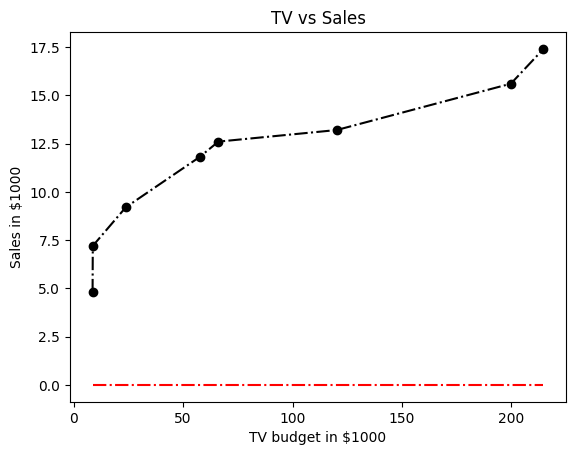

In [21]:
# Построить синтетические данные вместе с прогнозами 
plt.plot(x, y, 'r-.')

# Постройте исходные данные, используя черные o.
plt.plot(x_true, y_true, 'ko-.')

# Установите метки заголовка и оси
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')


## Часть 2: KNN для $ K \ ge1 $ с помощью Sklearn

In [22]:
# Прочитайте данные из файла "Advertising.csv"
data_filename = 'Advertising.csv'
df = pd.read_csv(data_filename)
# Установить «ТВ» как «переменную предиктора»
x = df[['TV']]

# Установите «продажи» как переменную ответа 'y'
y = df['Sales']


In [23]:
### edTest(test_shape) ###
# Разделите набор данных при обучении и тестировании с 60% обучающим набором
# и 40% тестирование с помощью случайного состояния = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.60,random_state=42)


In [30]:
### edTest(test_nums) ###

# Выберите минимальное значение k на основе инструкций, приведенных слева
k_value_min = 1

# Выберите максимальное значение k на основе инструкций, приведенных слева
k_value_max = 70

# Создать список значений целого числа K между K_VALUE_MIN и K_VALUE_MAX с использованием LINSPACE
k_list = np.linspace(k_value_min, k_value_max, 70)


In [33]:
k_list

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70.])

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


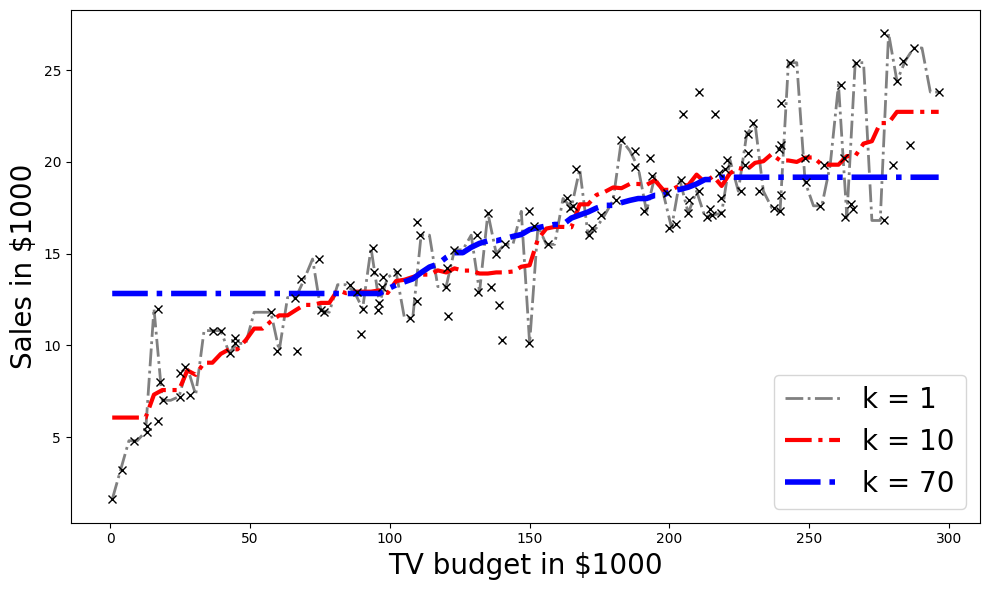

In [36]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))

# Variable used to alter the linewidth of each plot
j=0

# Loop over all the k values
for k_value in k_list:   
    
    # Creating a kNN Regression model 
    model = KNeighborsRegressor(n_neighbors= int(k_value))
    
    # Fitting the regression model on the training data 
    model.fit(x_train, y_train)
    
    # Use the trained model to predict on the test data 
    y_pred = model.predict(x_test)
    
    # Helper code to plot the data along with the model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(), 100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-.',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x', label='train', color='k')# точки тренировочного набора
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()


#### ⏸ В приведенном выше коде построения повторный разряд `ax.plot (x_train, y_train, 'x', label = 'train', color = 'k')` с `x_test` и` y_test` вместо этого.
По вашему мнению, какое значение k самое лучшее и почему?

In [35]:
### edTest(test_chow1) ###
# Type your answer within in the quotes given
answer1 = 'Лучшая модель ближе к 10, она более плавнаяи хорошо описывает среднее значение каждой категории, в то время как к = 1 просто повторяет все точки, кроме шума'
